<h1>Support Ticket Classification</h1>
Please download the data from the below source:

<a href="https://www.kaggle.com/code/aniketg11/support-tickets-classification/input">Dataset</a>


In [1]:
import pandas as pd # Library for data manipulation and analysis
import numpy as np # A fundamental package for scientific computing
import re # Support for regular expressions
import string # Support operations on strings
import matplotlib.pyplot as plt # A plotting library that provides a MATLAB-like plotting framework
import seaborn as sns # A Python data visualization library based on matplotlib
from sklearn.model_selection import train_test_split # A function from the scikit-learn library used to split data arrays into two subsets: for training data and for testing data
from sklearn.feature_extraction.text import CountVectorizer # Part of scikit-learn's text processing module. Converts a collection of text documents to a matrix of token counts
from sklearn.ensemble import RandomForestClassifier # A class that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve # This module includes score functions, performance metrics, and pairwise metrics and distance computations
from nltk.corpus import stopwords # NLTK function to access lists of stop words for several languages.
from nltk.tokenize import word_tokenize # NLTK function to split strings into tokens.
from nltk.util import ngrams # NLTK function to generate n-grams from sequences of items.
import nltk # Natural Language Toolkit (NLTK) is a leading platform for building programs to work with human language data.

# Download NLTK data files
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/grzywacz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/grzywacz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

EXERCISE 1: Fill in the code to load and display the dataset.

In [2]:
# LOAD DATASET
# TODO: Read the downloaded dataset CSV file to pandas data frame using pandas read_csv function
df =pd.read_csv('all_tickets.csv', sep=',')

In [3]:
# DATA EXPLORATION
# Let's print out the full table. There is a 'body' column with the content of the message and 'ticket_type' column
# with values 0 or 1, which is 0 = incident, 1= no_incident. Other columns are not used in this experiment.
# TODO: Display the dataset
df.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4


### PREPROCESSING - DATA CLEAN UP
In the preprocessing phase we will prepare the data to be properly consumed by the model. In this experiment we will apply the following (most common) techniques:
1. Tokenization and lowercasing - splitting text into words and change all to lowercase
2. Removing stopwords - Remove common words that do not contribute to the meaning
3. Removing punctuation and special characters - clean the text by removing punctuation and special characters
4. Bag of words/ Bigram character vectorization - convert the cleaned tokens into bigram characters.

EXERCISE 2: Fill in the code for preprocessing

In [4]:
# Define preprocessing function
def preprocess_text(text):
    # TODO: transform the text to lower case
    text_lower_case = text.lower()

    # TODO: tokenize lower case version of the text using function imported form nltk package
    tokens = word_tokenize(text_lower_case)

    stop_words = set(stopwords.words('english'))
    # TODO: remove stopwords from tokens
    tokens = [word for word in tokens if word not in stop_words]
    
    # Remove punctuation and special characters
    tokens = [re.sub(r'[^\w\s]', '', word) for word in tokens]
    # Remove empty strings
    tokens = [word for word in tokens if word]

    return tokens

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply preprocessing
# TODO: apply the preprocessing function to the 'body' column and assign result to new processed_text column
df['processed_text'] = df['body'].apply(preprocess_text)#.apply(lemmatize)

df['processed_text']

0        [hi, since, recruiter, lead, permission, appro...
1        [icon, dear, please, setup, icon, per, icon, e...
2        [work, experience, user, hi, work, experience,...
3        [requesting, meeting, hi, please, help, follow...
4        [expire, days, hi, ask, help, update, password...
                               ...                        
48544    [sent, tuesday, july, git, space, hi, got, rig...
48545    [sent, july, error, hi, guys, help, error, app...
48546    [sent, tuesday, july, connection, issues, hell...
48547    [sent, tuesday, july, error, hello, guys, rece...
48548    [hello, please, advised, running, extension, l...
Name: processed_text, Length: 48549, dtype: object

EXERCISE 3: Fill in the code to vectorize the text data.

In [5]:
def tokens2bigram(tokens):
    # Function transforming tokens into bigram character ngrams
    bigrams = list(ngrams(' '.join(tokens), 2))
    return [''.join(bigram) for bigram in bigrams]

# TODO: apply tokens2bigram function to processed_text column to and save result to new bigrams column
df['bigrams'] = df['processed_text'].apply(tokens2bigram)

# Convert the list of bigrams to a string for CountVectorizer
df['bigrams_str'] = df['bigrams'].apply(lambda x: ' '.join(x))

df['bigrams_str']

0        hi i   s si in nc ce e   r re ec cr ru ui it t...
1        ic co on n   d de ea ar r   p pl le ea as se e...
2        wo or rk k   e ex xp pe er ri ie en nc ce e   ...
3        re eq qu ue es st ti in ng g   m me ee et ti i...
4        ex xp pi ir re e   d da ay ys s   h hi i   a a...
                               ...                        
48544    se en nt t   t tu ue es sd da ay y   j ju ul l...
48545    se en nt t   j ju ul ly y   e er rr ro or r   ...
48546    se en nt t   t tu ue es sd da ay y   j ju ul l...
48547    se en nt t   t tu ue es sd da ay y   j ju ul l...
48548    he el ll lo o   p pl le ea as se e   a ad dv v...
Name: bigrams_str, Length: 48549, dtype: object

### VECTORIZATION

Convert the bigrams into vectors.

<a href="https://www.kaggle.com/code/samuelcortinhas/nlp3-bag-of-words-and-similarity">Useful article explaining 'Bag of Words' method </a>

In [6]:
# Vectorize (create feature vetors) bigram strings using CountVectorizer from sklearn
vectorizer = CountVectorizer()
# TODO: use fit_transform method to produce feature matrix from data in the bigrams_str column
X = vectorizer.fit_transform(df['bigrams_str'])

# TODO: display the shape of the resulting feature matrix
X.shape

## View vocabulary
# vectorizer.vocabulary_

(48549, 507)

### DATASET SPLIT

Splitting dataset into training and testing set. In this experiment we will use 80/20 ratio.

In [7]:
# Label
y = df['ticket_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### TRAINIG THE CLASSIFIER MODEL

In this experiment we will use Random Forest Classifier.

EXERCISE 4: Selecting Training Model

In [8]:
## Alternative models
# from sklearn.naive_bayes import MultinomialNB
# model = MultinomialNB()
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(max_iter=200)

# Training the classifier
model = RandomForestClassifier(n_estimators=20, random_state=42)
model.fit(X_train, y_train)

# TODO: Fit the model on the training data
# model.___(X_train, y_train)  # Example: model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

In [9]:
# Predictions and evaluation
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

### EVALUATION

EXERCISE 5: Evaluate the model

Evaluation metrics

In [10]:
# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9355303810504635
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88      2780
           1       0.94      0.97      0.96      6930

    accuracy                           0.94      9710
   macro avg       0.93      0.91      0.92      9710
weighted avg       0.93      0.94      0.93      9710



Confusion Matrix

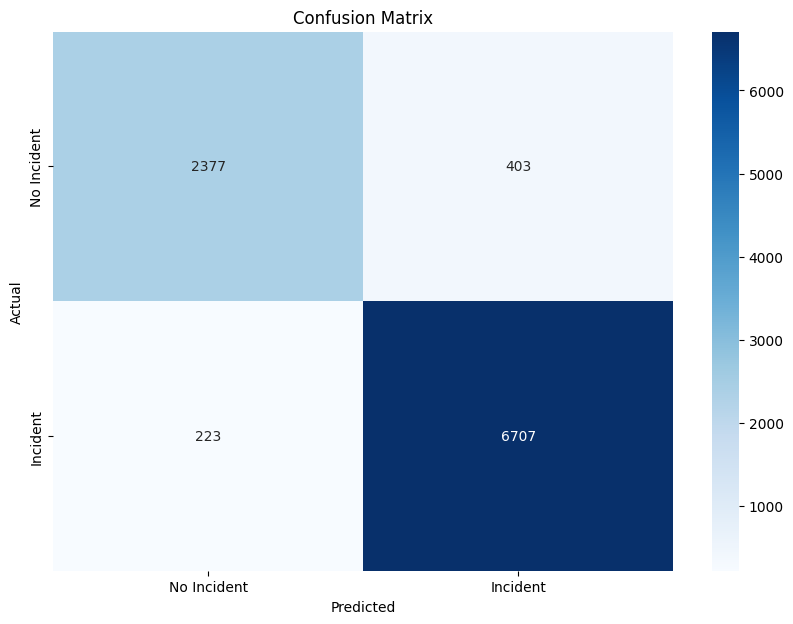

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Incident', 'Incident'], yticklabels=['No Incident', 'Incident'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Classification Report Metrics Plot

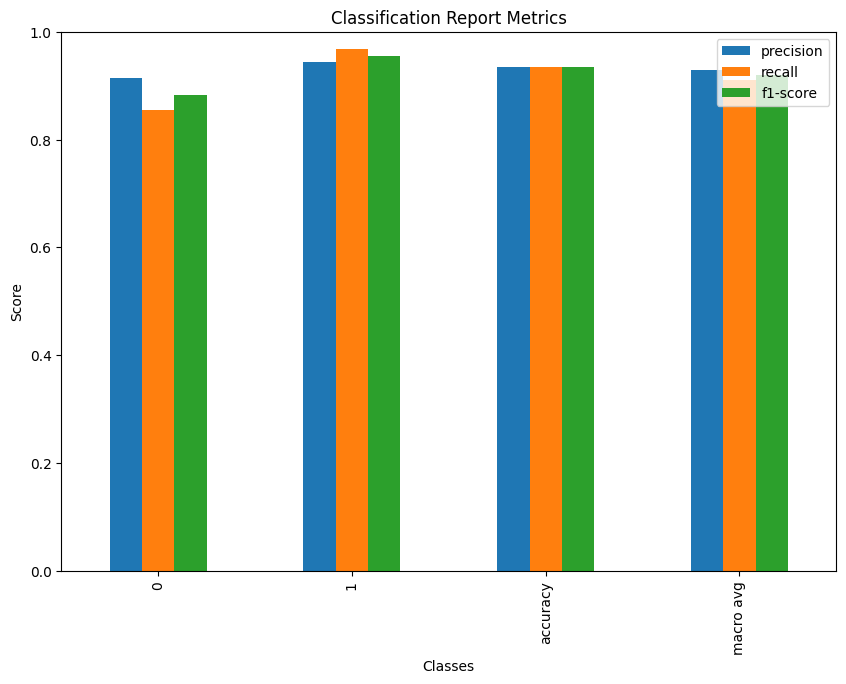

In [12]:
# Classification Report Metrics Plot
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot Precision, Recall and F1-score for each class
df_report.iloc[:-1, :-1].plot(kind='bar', figsize=(10, 7))
plt.title('Classification Report Metrics')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='upper right')
plt.show()

AUROC evaluation 

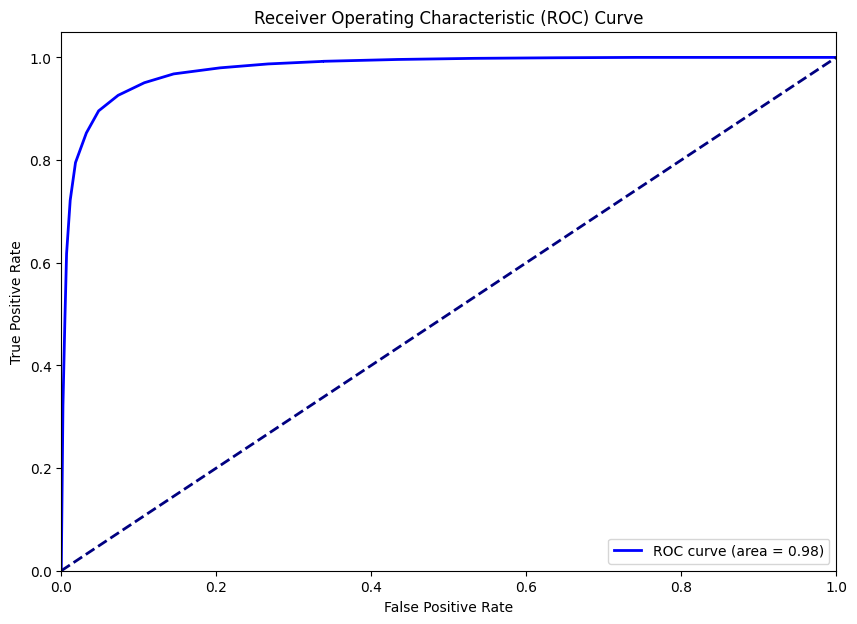

In [13]:
# AUROC evaluation
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plotting the ROC curve - Receiver Operating Characteristic curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()